In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

In [477]:
# reading data
data= pd.read_csv('dataset.csv')
print(data.shape)
data

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [478]:
# splitting data
X = data.iloc[:, :-1].values
Y = data.iloc[:, 6].values
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [479]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
ct = ColumnTransformer([("region", OneHotEncoder(), [5])], remainder = 'passthrough')
X = ct.fit_transform(X)
# avoiding dummy variables trap
X = X[:,1:]
X

array([[0.0, 0.0, 1.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 1.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [480]:
# initialize parameters
learning_rate = 0.2355 # tuning the learning rate
iterations = 30000 # tuning the iterations

In [481]:
# initialize theta
theta = np.zeros((X.shape[1]+1)) # rows = data.shape[1], col = 1

In [482]:
# normalize the features
X = ( X - X.mean() ) / X.std()
# Add a 1 column to the start to allow vectorized gradient descent
tmpX = np.ones((X.shape[0],X.shape[1]+1))
tmpX[:,1:] = X
X = tmpX
n = len(X)
print(X.shape)

(1338, 9)


In [483]:
# hypothesis
def h( theta, X, Y ):
    return np.dot(X,theta.T) - Y;

In [484]:
# cost generator
def cost_func( theta, X, Y ):
    return 1/2 * np.average(np.square( h( theta,X,Y ) ))

In [485]:
# gradient descent function
def gradient_descent( theta, X, Y, learning_rate, iterations ):
    cost_graph = np.zeros(iterations)
    for i in range(iterations):
        cost_graph[i] = cost_func(theta,X,Y)
        theta = theta - ( learning_rate * (1/n) * np.dot(X.T,h(theta,X,Y)) )
    return theta, cost_graph

Text(0.5, 1.0, 'cost per iteration')

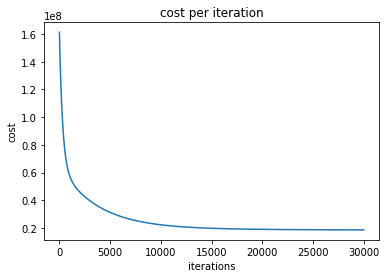

In [486]:
theta, cost_graph = gradient_descent(theta,X,Y,learning_rate,iterations)
fig, ax = plt.subplots()
ax.plot(cost_graph)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('cost per iteration')

In [487]:
# predicted values X4
pred_Y = np.dot(theta,X.T)

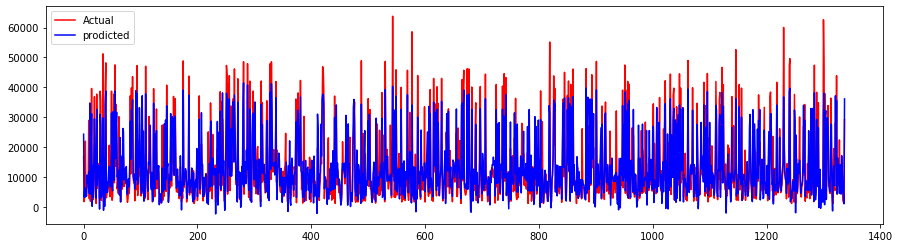

In [488]:
fig, ax = plt.subplots(figsize=(15,4))
pred_Y = np.ravel(pred_Y) # Flatten an array into a contiguous array
a1, = plt.plot(Y,color="red")
a2, = plt.plot(pred_Y,color="blue")
plt.legend([a1,a2], ["Actual", "prodicted"])

In [489]:
# R^2 square to find how good the model is
# the more it close to 1, the more predictive power the model has.
from sklearn import metrics
r2 = metrics.r2_score(Y, pred_Y)
print('R-square : ',r2)

R-square :  0.7468928124503271


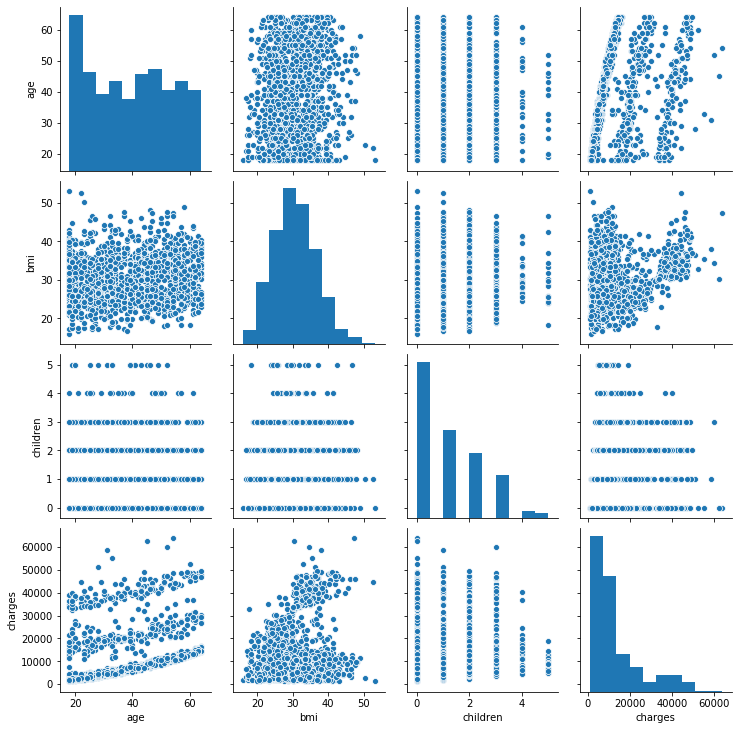

In [490]:
# compare paiwise attribute
import seaborn as sns
sns.pairplot(data)